In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Median value of owner-occupied homes in $1000')

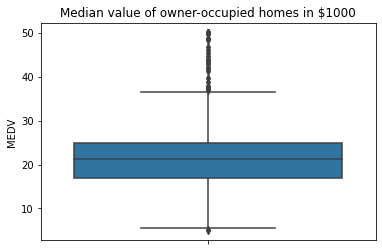

In [4]:
ax = sns.boxplot(y='MEDV', data = boston_df)
plt.title ('Median value of owner-occupied homes in $1000')

Text(0.5, 1.0, ' Charles River dummy variable (1 if tract bounds river; 0 otherwise)')

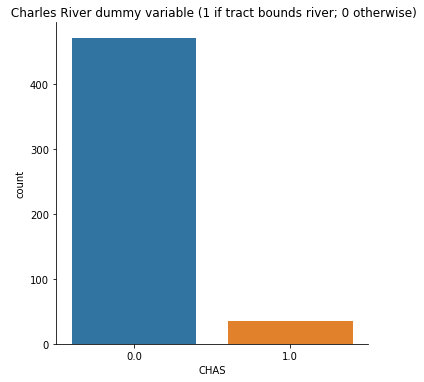

In [5]:
ax1 = sns.catplot(x='CHAS', kind ='count', data = boston_df)
plt.title(' Charles River dummy variable (1 if tract bounds river; 0 otherwise)')

In [6]:
boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 years & younger'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = 'between 35 & 70 years'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 years & older'

Text(0.5, 0, 'age groups ')

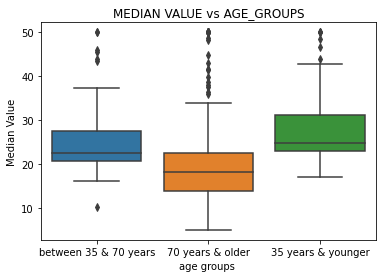

In [7]:
ax2 = sns.boxplot(x='age_group', y='MEDV', data = boston_df)
plt.title('MEDIAN VALUE vs AGE_GROUPS')
plt.ylabel('Median Value')
plt.xlabel('age groups ')

### Relationship between Nitric Oxide Concentrations and The Proportion of Non-retail Business Acres Per Town
Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

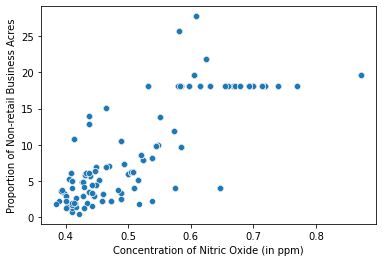

In [8]:
ax = sns.scatterplot(x='NOX', y='INDUS', data = boston_df)
plt.xlabel("Concentration of Nitric Oxide (in ppm)")
plt.ylabel("Proportion of Non-retail Business Acres");

From the above scatter plot, we can say that there is a positive sloping relationship between concentration of Nitric Oxides and the proportion of non-retail business areas per town. But as the concentration of grows more than 0.6 ppm, the industrial area remains approximately the same.

### The teacher pupil ratio
Create a histogram for the pupil to teacher ratio variable

Text(0.5, 6.79999999999999, 'COUNT')

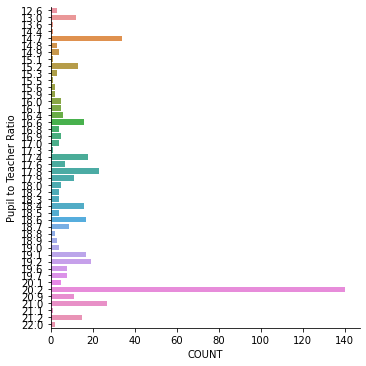

In [9]:
ax= sns.catplot(y='PTRATIO', kind='count',data = boston_df)
plt.ylabel("Pupil to Teacher Ratio");
plt.xlabel('COUNT')

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

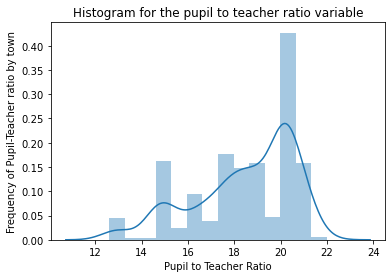

In [22]:
ax= sns.distplot(boston_df['PTRATIO'])
plt.ylabel('Frequency of Pupil-Teacher ratio by town')
plt.xlabel('Pupil to Teacher Ratio')
plt.title('Histogram for the pupil to teacher ratio variable')

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

## Question 1
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Stating Hypothesis**
-   $H_0: µ_1 = µ_2$ ("there is no difference in between the median value of houses bounded by Charles river and not bounded.")

-   $H_a: µ_1 ≠ µ_2$ ("there is a difference in between the median value of houses bounded by Charles river and not bounded.")

**Setting α to 0.05**

In [10]:
scipy.stats.levene(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV, center='mean')

# p_value<0.05, equal_var set to False

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV, equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is enough evidence for difference in median value of houses bounded by Charles river and not bounded by it.

### Question 2
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

**Stating Hypothesis**
-    Null Hypothesis: There is no difference in median values of houses for occupied units built prior to 1940.
-    Alternative Hypothesis: There is a difference in median values of houses for occupied units built prior to 1940.

**Setting alpha = 0.05**

In [12]:
boston_df.loc[(boston_df.AGE > 82), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 82), 'age_span'] = 'after 1940'

In [13]:
scipy.stats.levene(boston_df[boston_df.age_span=='before 1940']['MEDV'],
                  boston_df[boston_df.age_span=='after 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.581350317246303, pvalue=0.2091486621949195)

In [14]:
#var1 = boston_df[boston_df['age_span']=='before 1940']['MEDV']
#var2 = boston_df[boston_df['age_span']=='after 1940']['MEDV']

In [15]:
#f_statistic, p_value = scipy.stats.f_oneway(var1, var2)
#print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

**Conclusion:** Since the p-value from levene test is greater than 0.05, we fail to reject the null hypothesis 

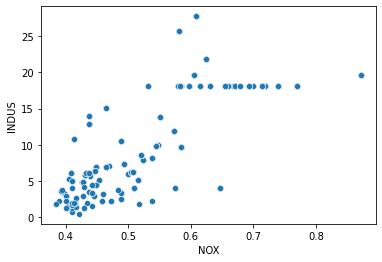

In [16]:
ax = sns.scatterplot(x='NOX', y='INDUS', data = boston_df)

In [17]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  prop of non retail business area and nitrogen dioxide concentration.


## Question 4
What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [18]:
## X is the input variables (or independent variables)
X = boston_df['DIS'] # because DIS variables impact has to be calculated so it is X variable.

## y is the target/dependent variable
y = boston_df['MEDV'] 
## add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           1.21e-08
Time:                        09:30:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The Pvalue<0.05, we reject null hypothesis.
Thus there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
There is an additional impact of **1.0916** of weighted distance  to the five Boston employment centres on the median value of owner occupied homes.